In [1]:
import pandas as pd
from gensim.models import Word2Vec
import re
from nltk.stem import SnowballStemmer, WordNetLemmatizer
stemmer = SnowballStemmer('english')
import nltk
nltk.download('wordnet')
import numpy as np
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/gigimancinelli./nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
criminality = ['theft', 'deviance', 'indictment', 'criminalization', 'guilt', 'government', 'tort', 
               'criminalness', 'criminalism', 'imprisonment', 'punishment', 'law', 'banditry', 'lawlessness', 
               'statutory', 'illegality', 'murder', 'immorality', 'sectarianism', 'dishonesty', 
               'impunity', 'criminalisation', 'brutality', 'thuggery', 'trial', 'recklessness', 'militancy', 
               'decriminalization', 'sentence', 'bigotry', 'extremism', 'viciousness', 'duplicity', 
               'xenophobia', 'mysonygy', 'stupidity', 'hypocrisy', 'irresponsibility', 'racism',
               'illegalities', 'coercion', 'vigilantism', 'imprisonment', 'plaintiff', 'criminology', 
               'felony', 'desertion', 'charge', 'power', 'wrong']
mental = ['schizophrenia', 'depression', 'bipolar', 'disorder', 'antisocial', 'personality', 'psychosis', 
          'psychotherapy', 'dementia', 'psychopathy', 'disability', 'anxiety', 'illness', 'alcoholism', 'brain', 
          'diagnosis', 'mind', 'symptoms', 'delusions', 'hallucinations', 'chronic', 'attention', 'deficit', 
          'hyperactivity', 'psychiatrists', 'disease', 'stress', 'epilepsy', 'agoraphobia', 'suffering', 
          'dysthymia', 'hypomania', 'sclerosis', 'psychiatric', 'psychological', 'disabilities', 'paraphilia', 
          'ocd', 'psychotic', 'syndrome', 'delusional', 'community', 'eating', 'disorder', 'anorexia', 'bulimia', 
          'nervosa', 'sickness', 'substance', 'abuse']

In [3]:
len(criminality)

50

In [4]:
len(mental)

50

In [5]:
model = Word2Vec.load("./model/word2vec_after_floyd.model")

In [6]:
df = pd.read_csv("./data/mpv_clean_pattern_stop.csv")

In [7]:
df.head()

,Unnamed: 0,name,gender,race,age,date,after_Floyd,city,state,cause_of_death,...,wapo_armed,wapo_threat_level,wapo_flee,wapo_body_camera,initial_reason,text,authors,TextColumn,cleaned,sentences
0,0,Clyde E. Young,Male,White,28.0,2024-02-22,True,West Alton,MO,Gunshot,...,NaN,Used Weapon,Not Fleeing,NaN,Murder (suspect),['A Godfrey man who had been charged with murd...,"[['Mike Koziatek'], []]",a godfrey man who had been charged with murd...,godfrey man who had been charged with murder i...,"[['godfrey', 'man', 'charg', 'murder', 'shoot'..."
1,1,Clyde E. Young,Male,White,28.0,2024-02-22,True,West Alton,MO,Gunshot,...,NaN,Used Weapon,Not Fleeing,NaN,Murder (suspect),"['The man, identified as Clyde Young, was char...","[['Mike Koziatek'], []]",the man identified as clyde young was char...,the man identified as clyde young was charged ...,"[['man', 'identifi', 'clyde', 'young', 'charg'..."
2,2,Jamarcus Brown,Male,Black,35.0,2024-02-21,True,Lake Cormorant,MS,Gunshot,...,NaN,Attack,Car,Victim Facebook Live Video,Traffic Stop,"['DESOTO COUNTY, Miss. (WMC) - Mississippi Bur...","[[], ['Lakiya Scott'], []]",desoto county miss wmc mississippi bur...,desoto county miss wmc mississippi bureau of i...,"[['desoto', 'counti', 'miss', 'wmc', 'mississi..."
3,3,Jamarcus Brown,Male,Black,35.0,2024-02-21,True,Lake Cormorant,MS,Gunshot,...,NaN,Attack,Car,Victim Facebook Live Video,Traffic Stop,['Close Get email notifications on {{subject}}...,"[[], ['Lakiya Scott'], []]",close get email notifications on subject ...,close get on subject are only sent and only if...,"[['close', 'get', 'subject', 'sent', 'new']]"
4,4,Jamarcus Brown,Male,Black,35.0,2024-02-21,True,Lake Cormorant,MS,Gunshot,...,NaN,Attack,Car,Victim Facebook Live Video,Traffic Stop,['The Carlos Moore Law Group said it has been ...,"[[], ['Lakiya Scott'], []]",the carlos moore law group said it has been ...,the carlos moore law group said it has been re...,"[['carlo', 'moor', 'law', 'group', 'said', 're..."


In [8]:
states = pd.read_csv("./data/full_dataset_mpv.csv",low_memory=False)
most_violent_states = states.groupby('state').count().sort_values('name', ascending=False).index[:3]
most_violent_states = most_violent_states.tolist()

In [9]:
most_violent_states.append('MN')
df = df[(df.after_Floyd == 1) & (df.state.isin(most_violent_states))]
df.head()

,Unnamed: 0,name,gender,race,age,date,after_Floyd,city,state,cause_of_death,...,wapo_armed,wapo_threat_level,wapo_flee,wapo_body_camera,initial_reason,text,authors,TextColumn,cleaned,sentences
8,8,Name Withheld,Female,Unknown race,NaN,2024-02-20,True,Orlando,FL,"Physical Restraint,Beaten",...,NaN,Other,Not Fleeing,NaN,erratic agressive behavior,['The Florida Department of Law Enforcement is...,"[['Fox News Staff'], ['Amanda Rabines'], [], [...",the florida department of law enforcement is...,the florida department of law enforcement is i...,"[['florida', 'depart', 'law', 'enforc', 'inves..."
9,9,Name Withheld,Female,Unknown race,NaN,2024-02-20,True,Orlando,FL,"Physical Restraint,Beaten",...,NaN,Other,Not Fleeing,NaN,erratic agressive behavior,['A woman who fought an Orange County deputy d...,"[['Fox News Staff'], ['Amanda Rabines'], [], [...",a woman who fought an orange county deputy d...,woman who fought an orange county deputy died ...,"[['woman', 'fought', 'orang', 'counti', 'deput..."
10,10,Name Withheld,Female,Unknown race,NaN,2024-02-20,True,Orlando,FL,"Physical Restraint,Beaten",...,NaN,Other,Not Fleeing,NaN,erratic agressive behavior,"['ORANGE COUNTY, Fla. — The Florida Department...","[['Fox News Staff'], ['Amanda Rabines'], [], [...",orange county fla the florida department...,orange county fla the florida department of la...,"[['orang', 'counti', 'fla', 'florida', 'depart..."
11,11,Name Withheld,Female,Unknown race,NaN,2024-02-20,True,Orlando,FL,"Physical Restraint,Beaten",...,NaN,Other,Not Fleeing,NaN,erratic agressive behavior,"['ORANGE COUNTY, Fla. – A woman died early Tue...","[['Fox News Staff'], ['Amanda Rabines'], [], [...",orange county fla a woman died early tue...,orange county fla woman died early tuesday mor...,"[['orang', 'counti', 'fla', 'woman', 'die', 'e..."
37,37,Name Withheld,Male,Unknown race,40.0,2024-02-17,True,Daytona Beach,FL,Vehicle,...,NaN,NaN,Foot,NaN,driving under the influence,['A 40-year-old man is dead after being pulled...,"[['Natalia Jaramillo'], []]",a XXXXXX year old man is dead after being pu...,year old man is dead after being pulled over n...,"[['year', 'old', 'man', 'dead', 'pull', 'near'..."


In [10]:
def create_embedding(text):
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text)
    text = text.strip()
    embeddings = [model.wv[word] for word in text.split()]
    if len(embeddings) == 0:
        return 0
    emb = sum(embeddings) / len(embeddings)
    return emb

In [11]:
for state in most_violent_states:
    df_state = df[df.state == state]
    df.loc[:,f'emb_{state}'] = df_state.sentences.apply(create_embedding)

In [12]:
df.allegedly_armed.unique()

array(['Unarmed/Did Not Have Actual Weapon', 'Allegedly Armed', 'Unclear',
       'Vehicle'], dtype=object)

In [13]:
df.iloc[0].emb_CA

nan

In [14]:
def create_embedding_dimension_lem(l):
    lemmatized = [lemmatizer.lemmatize(w) for w in l] 
    embeddings = [model.wv[word] for word in lemmatized if word in model.wv]
    if len(embeddings) == 0:
        return 0
    emb = sum(embeddings) / len(embeddings)
    return emb

In [15]:
def create_embedding_dimension(l):
    stemmed = [stemmer.stem(w) for w in l] 
    embeddings = [model.wv[word] for word in stemmed if word in model.wv]
    if len(embeddings) == 0:
        return 0
    emb = sum(embeddings) / len(embeddings)
    return emb

In [16]:
criminal_dimension = create_embedding_dimension(criminality)
mental_dimension = create_embedding_dimension(mental)

In [17]:
criminal_dimension_lem = create_embedding_dimension_lem(criminality)
mental_dimension_lem = create_embedding_dimension_lem(mental)

In [18]:
criminal_dimension

array([ 0.48185667, -0.29067114, -0.02328756,  1.0173376 , -0.00262295,
        0.32315028,  0.0102172 ,  0.04115352,  0.5617864 , -0.25594172,
       -0.02258981, -0.14812975,  0.19523141,  0.14661625, -0.1231785 ,
        0.01629736, -0.35857302, -0.3640997 ,  0.160941  , -0.14601111,
        0.33041674, -0.19675404, -0.16748135,  0.3509027 ,  0.5266303 ,
       -0.25047308, -0.3283377 ,  0.04945433,  0.30082163, -0.33794436,
       -0.24332726,  0.06081062, -0.12688014, -0.04587855, -0.00920145,
       -0.17062224,  0.33276197, -0.29765394, -0.23426452, -0.03429982,
        0.36853418,  0.30011386,  0.22791675, -0.04922949,  0.14911349,
        0.0801766 ,  0.40147913,  0.04598879,  0.082009  , -0.3954378 ,
       -0.07244122, -0.8299443 ,  0.08405897, -0.02589502,  0.06998356,
       -0.06339041, -0.5905598 ,  0.5270096 ,  0.29970676,  0.19546486,
        0.05704613, -0.00138836, -0.58369786,  0.34153995, -0.04486914,
        0.3250015 ,  0.1055781 , -0.3132597 , -0.16640367, -0.15

In [19]:
mental_dimension

array([ 0.0835821 , -0.03890316, -0.13882746,  0.1736689 , -0.11966457,
        0.34922296,  0.3821998 ,  0.4180838 ,  0.2965044 ,  0.05121891,
       -0.3189833 , -0.06237726,  0.11268842, -0.05812778,  0.18638574,
       -0.0776457 ,  0.08713111, -0.165576  , -0.09483791, -0.04078311,
        0.21254803,  0.00299751, -0.16696435, -0.11597219,  0.05100149,
        0.0774111 , -0.48192483,  0.02559702, -0.2398444 , -0.2764836 ,
       -0.14428782, -0.15782695, -0.07743987, -0.15650575, -0.14785792,
        0.0378073 ,  0.31388265, -0.2475649 , -0.18309937,  0.0907766 ,
        0.14079157,  0.4222354 ,  0.1457017 , -0.1807374 , -0.06409986,
        0.23389973,  0.01351767,  0.05323225,  0.76022136, -0.22741105,
       -0.19829033, -0.36940858,  0.32045698, -0.11332951, -0.05851116,
       -0.02790882, -0.21788566,  0.26785702, -0.01951455,  0.27599868,
       -0.25719467, -0.15077698, -0.14044656, -0.03109357,  0.17113249,
        0.44819504,  0.24867143, -0.10748203, -0.47295997,  0.14

In [20]:
def cosine_similarity(v1, v2):
    dot_ = np.dot(v1, v2)
    norm1 = np.linalg.norm(v1)
    norm2 = np.linalg.norm(v2)
    if norm1 > 0 and norm2 > 0:
        return dot_ / (norm1 * norm2)
    else:
        return 0.0

In [21]:
cosine_similarity(criminal_dimension, mental_dimension)

0.46419075

In [22]:
cosine_similarity(criminal_dimension_lem, mental_dimension_lem)

0.3644527

In [23]:
for state in most_violent_states:
    df.loc[:,f'cosine_{state}_criminal'] = df[f'emb_{state}'].apply(lambda x: cosine_similarity(criminal_dimension, x))
    df.loc[:,f'cosine_{state}_mental'] = df[f'emb_{state}'].apply(lambda x: cosine_similarity(mental_dimension, x))

In [24]:
for state in most_violent_states: 
    df.loc[:,f'cosine_{state}_criminal_lem'] = df[f'emb_{state}'].apply(lambda x: cosine_similarity(criminal_dimension_lem, x))
    df.loc[:,f'cosine_{state}_mental_lem'] = df[f'emb_{state}'].apply(lambda x: cosine_similarity(mental_dimension_lem, x))

In [25]:
df.columns

Index(['Unnamed: 0', 'name', 'gender', 'race', 'age', 'date', 'after_Floyd',
       'city', 'state', 'cause_of_death', 'circumstances', 'news_urls',
       'signs_of_mental_illness', 'officer_charged', 'allegedly_armed',
       'wapo_armed', 'wapo_threat_level', 'wapo_flee', 'wapo_body_camera',
       'initial_reason', 'text', 'authors', 'TextColumn', 'cleaned',
       'sentences', 'emb_CA', 'emb_TX', 'emb_FL', 'emb_MN',
       'cosine_CA_criminal', 'cosine_CA_mental', 'cosine_TX_criminal',
       'cosine_TX_mental', 'cosine_FL_criminal', 'cosine_FL_mental',
       'cosine_MN_criminal', 'cosine_MN_mental', 'cosine_CA_criminal_lem',
       'cosine_CA_mental_lem', 'cosine_TX_criminal_lem',
       'cosine_TX_mental_lem', 'cosine_FL_criminal_lem',
       'cosine_FL_mental_lem', 'cosine_MN_criminal_lem',
       'cosine_MN_mental_lem'],
      dtype='object')

In [26]:
from collections import defaultdict


def extract_sign_mental(col):
    if col == 'Yes' or col == 'Drug or Alcohol Use' or col == 'History of Drug or Alcohol Use':
        return 1
    else:
        return 0
    
def extract_sign_armed(col):
    if col == 'Allegedly Armed' or col == 'Vehicle':
        return 1
    else:
        return 0

def code_to_name(state_code):
    state_names = { 'MN': 'Minnesota',  'CA': 'California', 'TX': 'Texas', 'FL': 'Florida'}
    return state_names[state_code]  

def compare_proxy(method): 
    
    ''' method: 'stemmer' or 'lemmatizer' 
    Returns the proxy and the average bias for each of the most violent states'''
    
    distances = defaultdict(dict)   
    for state in most_violent_states: 
        if method == 'stemmer': 
            #create average criminal and mental dimension
            average_criminal_white = df[(df.race == 'White') & (df.state == state)][f'cosine_{state}_criminal'].sum() / len(df[(df.race == 'White') & (df.state == state)])
            average_criminal_black = df[(df.race == 'Black') & (df.state == state)][f'cosine_{state}_criminal'].sum() / len(df[(df.race == 'Black') & (df.state == state)])
            average_mental_white = df[(df.race == 'White') & (df.state == state)][f'cosine_{state}_mental'].sum() / len(df[(df.race == 'White') & (df.state == state)])
            average_mental_black = df[(df.race == 'Black') & (df.state == state)][f'cosine_{state}_mental'].sum() / len(df[(df.race == 'Black') & (df.state == state)])
            
            df[f'mental_{state}'] = df['signs_of_mental_illness'].apply(extract_sign_mental)
            df[f'criminal_{state}'] = df['allegedly_armed'].apply(extract_sign_armed)
            
            proxy_criminal_white = df[(df.race == 'White') & (df.state == state)][f'criminal_{state}'].sum() / len(df[(df.race == 'White') & (df.state == state)])
            proxy_criminal_black = df[(df.race == 'Black') & (df.state == state)][f'criminal_{state}'].sum() / len(df[(df.race == 'Black') & (df.state == state)])
            proxy_mental_white = df[(df.race == 'White') & (df.state == state)][f'mental_{state}'].sum() / len(df[(df.race == 'White') & (df.state == state)])
            
            proxy_mental_black = df[(df.race == 'Black') & (df.state == state)][f'mental_{state}'].sum() / len(df[(df.race == 'Black') & (df.state == state)])
            #calculate the distance between the proxies
            distances[state] = {'criminal_bias_white': average_criminal_white*proxy_criminal_white, 'criminal_bias_black': average_criminal_black*proxy_criminal_black,
                    'mental_bias_white': average_mental_white*proxy_mental_white, 'mental_bias_black':  average_mental_black*proxy_mental_black}
            
            print(f"State: {code_to_name(state)}, method: {method}")
            print(f"Proportion of white victims armed: {proxy_criminal_white}. Criminal bias in articles for white victims: {average_criminal_white}")
            print(f"Proportion of black victims armed: {proxy_criminal_black}. Criminal bias in articles for black victims: {average_criminal_black}")
            print(f"Proportion of white victims with signs of mental illness: {proxy_mental_white}. Mental bias in articles for white victims: {average_mental_white}")
            print(f"Proportion of black victims with signs of mental illness: {proxy_mental_black}. Mental bias in articles for black victims: {average_mental_black}")
            df.drop(columns=[f'mental_{state}', f'criminal_{state}'], inplace=True)
        else: 
            #create average criminal and mental dimension
            average_criminal_white = df[(df.race == 'White') & (df.state == state)][f'cosine_{state}_criminal_lem'].sum() / len(df[(df.race == 'White') & (df.state == state)])
            average_criminal_black = df[(df.race == 'Black') & (df.state == state)][f'cosine_{state}_criminal_lem'].sum() / len(df[(df.race == 'Black') & (df.state == state)])
            average_mental_white = df[(df.race == 'White') & (df.state == state)][f'cosine_{state}_criminal_lem'].sum() / len(df[(df.race == 'White') & (df.state == state)])
            average_mental_black = df[(df.race == 'Black') & (df.state == state)][f'cosine_{state}_criminal_lem'].sum() / len(df[(df.race == 'Black') & (df.state == state)])
            
            df[f'mental_{state}_lem'] = df['signs_of_mental_illness'].apply(extract_sign_mental)
            df[f'criminal_{state}_lem'] = df['allegedly_armed'].apply(extract_sign_armed)
            
            proxy_criminal_white = df[(df.race == 'White') & (df.state == state)][f'criminal_{state}_lem'].sum() / len(df[(df.race == 'White') & (df.state == state)])
            proxy_criminal_black = df[(df.race == 'Black') & (df.state == state)][f'criminal_{state}_lem'].sum() / len(df[(df.race == 'Black') & (df.state == state)])
            proxy_mental_white = df[(df.race == 'White') & (df.state == state)][f'mental_{state}_lem'].sum() / len(df[(df.race == 'White') & (df.state == state)])
            proxy_mental_black = df[(df.race == 'Black') & (df.state == state)][f'mental_{state}_lem'].sum() / len(df[(df.race == 'Black') & (df.state == state)])
            
            #calculate the distance between the proxies
            distances[state] = {'criminal_bias_white': average_criminal_white*proxy_criminal_white, 'criminal_bias_black': average_criminal_black*proxy_criminal_black,
                                'mental_bias_white': average_mental_white*proxy_mental_white, 'mental_bias_black':  average_mental_black*proxy_mental_black}
            
            print(f"State: {code_to_name(state)}, method: {method}")
            print(f"Proportion of white victims armed: {proxy_criminal_white}. Criminal bias in articles for white victims: {average_criminal_white}")
            print(f"Proportion of black victims armed: {proxy_criminal_black}. Criminal bias in articles for black victims: {average_criminal_black}")
            print(f"Proportion of white victims with signs of mental illness: {proxy_mental_white}. Mental bias in articles for white victims: {average_mental_white}")
            print(f"Proportion of black victims with signs of mental illness: {proxy_mental_black}. Mental bias in articles for black victims: {average_mental_black}")
            df.drop(columns=[f'mental_{state}_lem', f'criminal_{state}_lem'], inplace=True)
    return distances

In [27]:
stem_biases = compare_proxy('stemmer')
stem_biases

State: California, method: stemmer
Proportion of white victims armed: 0.7251184834123223. Criminal bias in articles for white victims: 0.30490814664917537
Proportion of black victims armed: 0.8523489932885906. Criminal bias in articles for black victims: 0.30884279510718865
Proportion of white victims with signs of mental illness: 0.36018957345971564. Mental bias in articles for white victims: 0.11990676641186161
Proportion of black victims with signs of mental illness: 0.37583892617449666. Mental bias in articles for black victims: 0.12899744075616734
State: Texas, method: stemmer
Proportion of white victims armed: 0.782608695652174. Criminal bias in articles for white victims: 0.2973437474010894
Proportion of black victims armed: 0.7227722772277227. Criminal bias in articles for black victims: 0.3489597737789154
Proportion of white victims with signs of mental illness: 0.2670807453416149. Mental bias in articles for white victims: 0.11066922450854634
Proportion of black victims with 

defaultdict(dict,
            {'CA': {'criminal_bias_white': 0.22109453287831202,
              'criminal_bias_black': 0.2632418454940467,
              'mental_bias_white': 0.04318916704882219,
              'mental_bias_black': 0.04848225961305618},
             'TX': {'criminal_bias_white': 0.23270380231389604,
              'criminal_bias_black': 0.2522184503550577,
              'mental_bias_white': 0.029557618968121074,
              'mental_bias_black': 0.022267415116128148},
             'FL': {'criminal_bias_white': 0.2845010019028187,
              'criminal_bias_black': 0.2528534980746253,
              'mental_bias_white': 0.05476878598991036,
              'mental_bias_black': 0.036949861085148444},
             'MN': {'criminal_bias_white': 0.38168305600993335,
              'criminal_bias_black': 0.3733213131573651,
              'mental_bias_white': 0.10741144592854349,
              'mental_bias_black': 0.01396584255672741}})

In [32]:
import matplotlib.pyplot as plt

def plot_bias(biases, method = 'stemmer'): 
    # Create a DataFrame from the dictionary
    data = pd.DataFrame(biases).T

    # Plotting using DataFrame's plot method
    fig, ax = plt.subplots(figsize=(10, 6))
    data.plot(kind='bar', ax=ax, color=['#FF9999', '#9999FF', '#FFCC99', '#99CCFF'])
    ax.set_title('Comparison of Bias Metrics Across States after Floyd')
    ax.set_xlabel('State')
    ax.set_ylabel(f'Bias Value with {method}')
    ax.legend(title='Metric')

    plt.show()

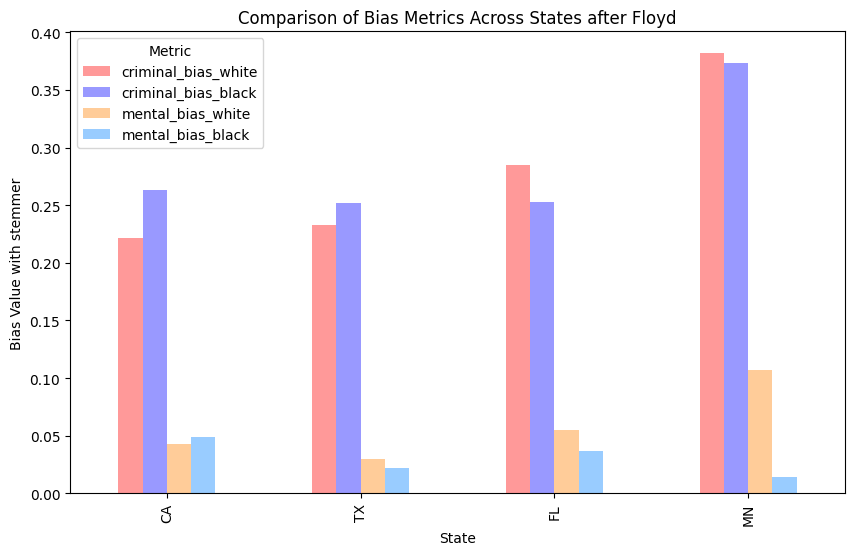

In [33]:
plot_bias(stem_biases)

In [30]:
lem_biases = compare_proxy('lemmatizer')
lem_biases

State: California, method: lemmatizer
Proportion of white victims armed: 0.7251184834123223. Criminal bias in articles for white victims: 0.29618885587035765
Proportion of black victims armed: 0.8523489932885906. Criminal bias in articles for black victims: 0.30736643065942215
Proportion of white victims with signs of mental illness: 0.36018957345971564. Mental bias in articles for white victims: 0.29618885587035765
Proportion of black victims with signs of mental illness: 0.37583892617449666. Mental bias in articles for black victims: 0.30736643065942215
State: Texas, method: lemmatizer
Proportion of white victims armed: 0.782608695652174. Criminal bias in articles for white victims: 0.2834125648929466
Proportion of black victims armed: 0.7227722772277227. Criminal bias in articles for black victims: 0.3435489089772253
Proportion of white victims with signs of mental illness: 0.2670807453416149. Mental bias in articles for white victims: 0.2834125648929466
Proportion of black victims 

defaultdict(dict,
            {'CA': {'criminal_bias_white': 0.21477201397234466,
              'criminal_bias_black': 0.26198346774326586,
              'mental_bias_white': 0.10668413765946531,
              'mental_bias_black': 0.11552026924112511},
             'TX': {'criminal_bias_white': 0.22180113774230603,
              'criminal_bias_black': 0.24830762728056877,
              'mental_bias_white': 0.07569403907078698,
              'mental_bias_black': 0.049321378021482835},
             'FL': {'criminal_bias_white': 0.28292420284867287,
              'criminal_bias_black': 0.2537627187783479,
              'mental_bias_white': 0.11580153418922425,
              'mental_bias_black': 0.0823014223064912},
             'MN': {'criminal_bias_white': 0.3580973465707049,
              'criminal_bias_black': 0.3611629730889387,
              'mental_bias_white': 0.22095368192660517,
              'mental_bias_black': 0.028893037847115097}})

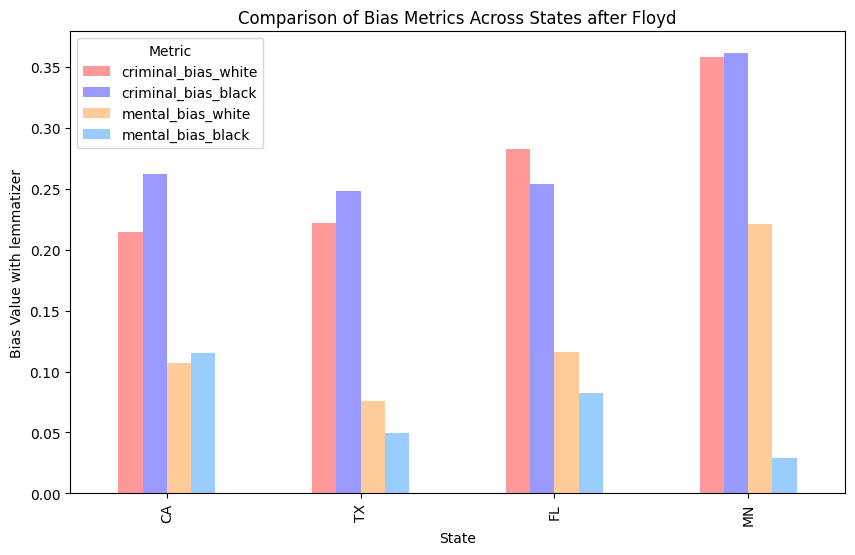

In [34]:
plot_bias(lem_biases, 'lemmatizer')